In [7]:
from google.colab import files

uploaded = files.upload()

Saving Tucson_Police_Arrests_-_2021_-_Open_Data.csv to Tucson_Police_Arrests_-_2021_-_Open_Data.csv
Saving Neighborhood_Income.csv to Neighborhood_Income.csv


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

#load data frames from csv
neighborhoodPath = "Neighborhood_Income.csv"
df_neighborhood_income = pd.read_csv(neighborhoodPath)
df_neighborhood_income = df_neighborhood_income[df_neighborhood_income["HasData_1"] != 0]

crimePath = "Tucson_Police_Arrests_-_2021_-_Open_Data.csv"
df_crime = pd.read_csv(crimePath)

print("crime head:")
display(df_crime.head())

print("neighborhood head:")
display(df_neighborhood_income.head())


crime head:


,OBJECTID,X,Y,arre_id,case_id,agency,date_arr,time_arr,datetime_arr,MONTH_ARR,...,LOC_STATUS,WARD,NHA_NAME,TMSECT,DIVISION,DIVISION_NO,DIVSECT,TRSQ,City_geo,ADDRESS_100BLK
0,1,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
1,2,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
2,3,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
3,4,1.053154e+06,443419.380064,2021000110,2101020138,TPD,2021/01/02 00:00:00+00,1844,2021/01/02 18:44:00+00,01-Jan,...,GEOCODED,2.0,Eastside,NaN,Operations Division East,T4,T406,14S15E14NE,TUCSON,10198 E ESSEX VILLAGE DR
4,5,1.053154e+06,443419.380064,2021000110,2101020138,TPD,2021/01/02 00:00:00+00,1844,2021/01/02 18:44:00+00,01-Jan,...,GEOCODED,2.0,Eastside,NaN,Operations Division East,T4,T406,14S15E14NE,TUCSON,10198 E ESSEX VILLAGE DR


neighborhood head:


,OBJECTID,NAME,WARD,DATASOURCE,ID,sourceCountry,ENRICH_FID,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,...,AGGDIA75CY,ID_1,sourceCountry_1,ENRICH_FID_1,aggregationMethod_1,populationToPolygonSizeRating_1,apportionmentConfidence_1,HasData_1,TOTHH_CY,WLTHINDXCY
0,1,A Mountain,1,NEIGHBORHOODS,0,US,1,BlockApportionment:US.BlockGroups,2.191,2.576,...,1590160,0,US,1,BlockApportionment:US.BlockGroups,2.191,2.576,1,1103,32
1,2,Adelanto,3,NEIGHBORHOODS,1,US,2,BlockApportionment:US.BlockGroups,2.191,2.576,...,154598,1,US,2,BlockApportionment:US.BlockGroups,2.191,2.576,1,117,28
2,3,Alvernon Heights,5,NEIGHBORHOODS,2,US,3,BlockApportionment:US.BlockGroups,2.191,2.576,...,172634,2,US,3,BlockApportionment:US.BlockGroups,2.191,2.576,1,99,26
3,4,Amphi,3,NEIGHBORHOODS,3,US,4,BlockApportionment:US.BlockGroups,2.191,2.576,...,2760918,3,US,4,BlockApportionment:US.BlockGroups,2.191,2.576,1,3105,20
4,5,Armory Park,6,NEIGHBORHOODS,4,US,5,BlockApportionment:US.BlockGroups,2.191,2.576,...,3785750,4,US,5,BlockApportionment:US.BlockGroups,2.191,2.576,1,1223,48


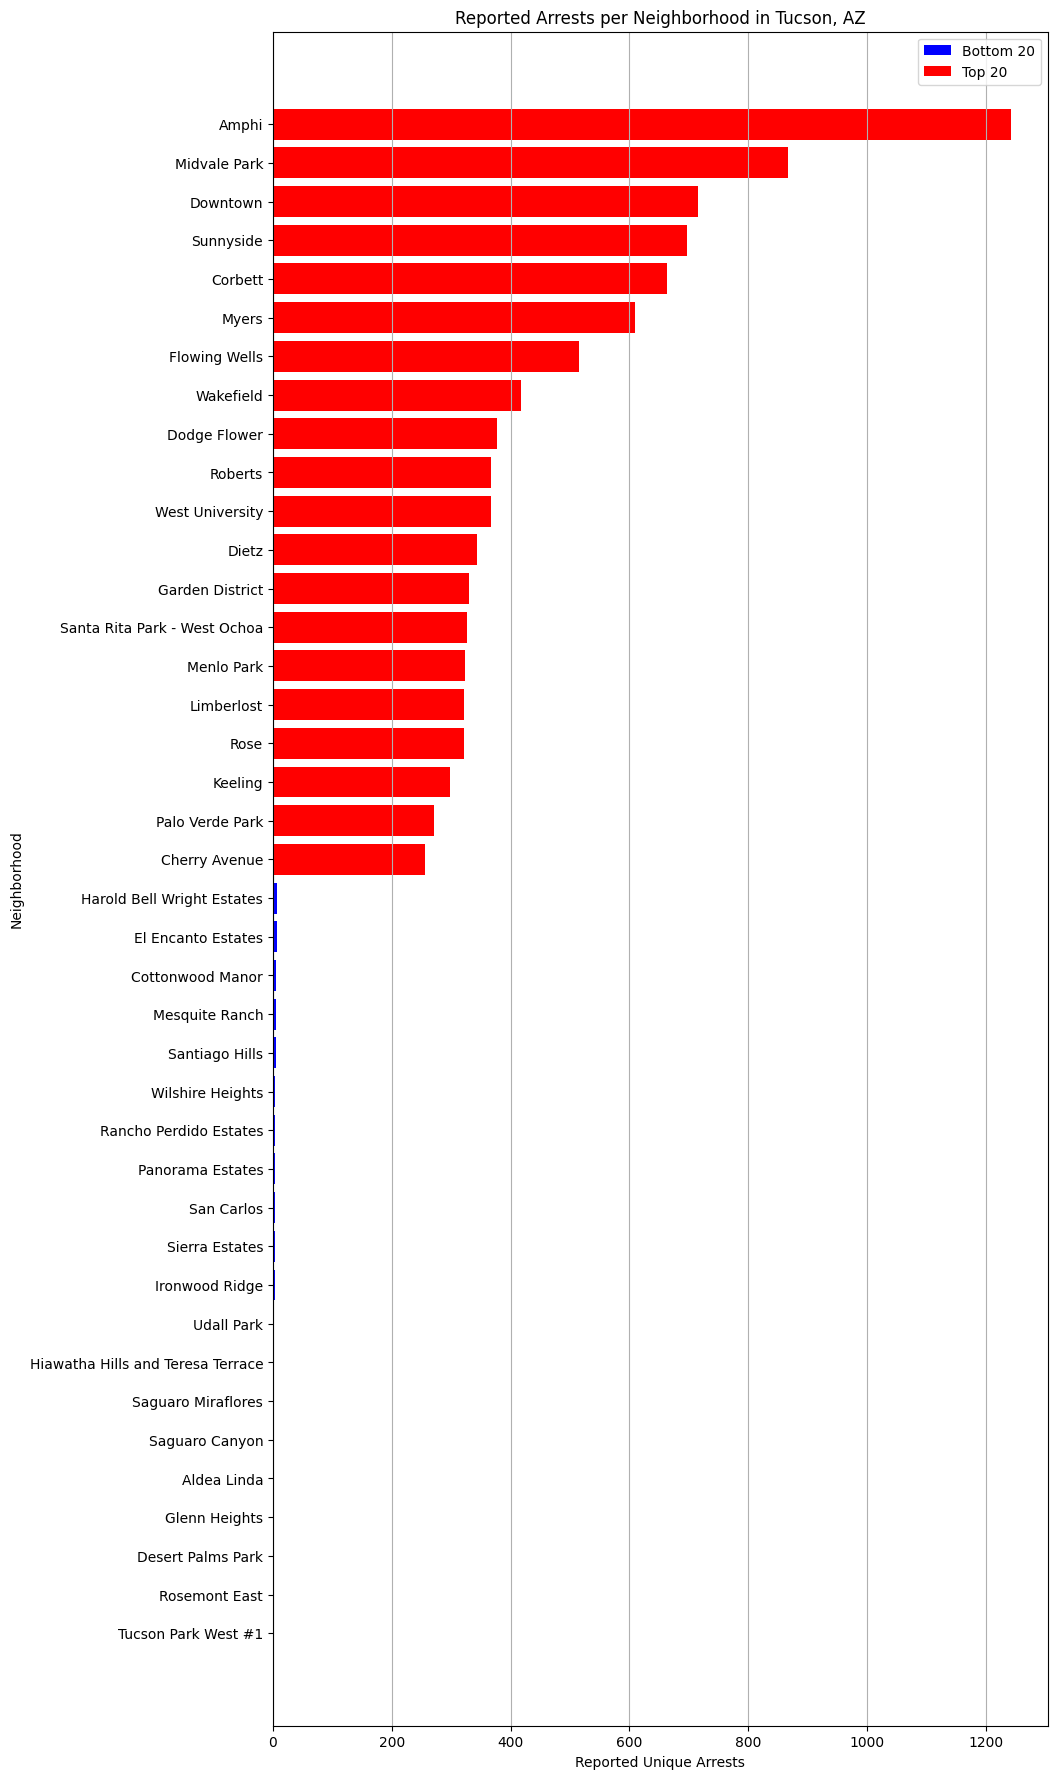

In [9]:

# Bar chart of crimes per neighborhood
df_crime.drop_duplicates("arre_id", inplace=True)
crimes_per_neighborhood = df_crime[["NHA_NAME"]].value_counts()


topcrimes_per_neighborhood = crimes_per_neighborhood.head(20)[::-1]
botcrimes_per_neighborhood = crimes_per_neighborhood.tail(20)[::-1]


neighborhoodCrimes = [n[0] for n in crimes_per_neighborhood.index]

topneighborhoodCrimes = neighborhoodCrimes[:20][::-1]
botneighborhoodCrimes = neighborhoodCrimes[-20:][::-1]

plt.figure(figsize=(10, 22))
plt.barh(botneighborhoodCrimes, botcrimes_per_neighborhood, color = "b")
plt.barh(topneighborhoodCrimes, topcrimes_per_neighborhood, color = "r")

plt.legend(["Bottom 20", "Top 20"])
plt.ylabel("Neighborhood")
plt.xlabel("Reported Unique Arrests")
plt.title("Reported Arrests per Neighborhood in Tucson, AZ")
plt.grid(axis="x")
plt.show()

Median Household Income of all of Tuscon's neighborhood: $54,546


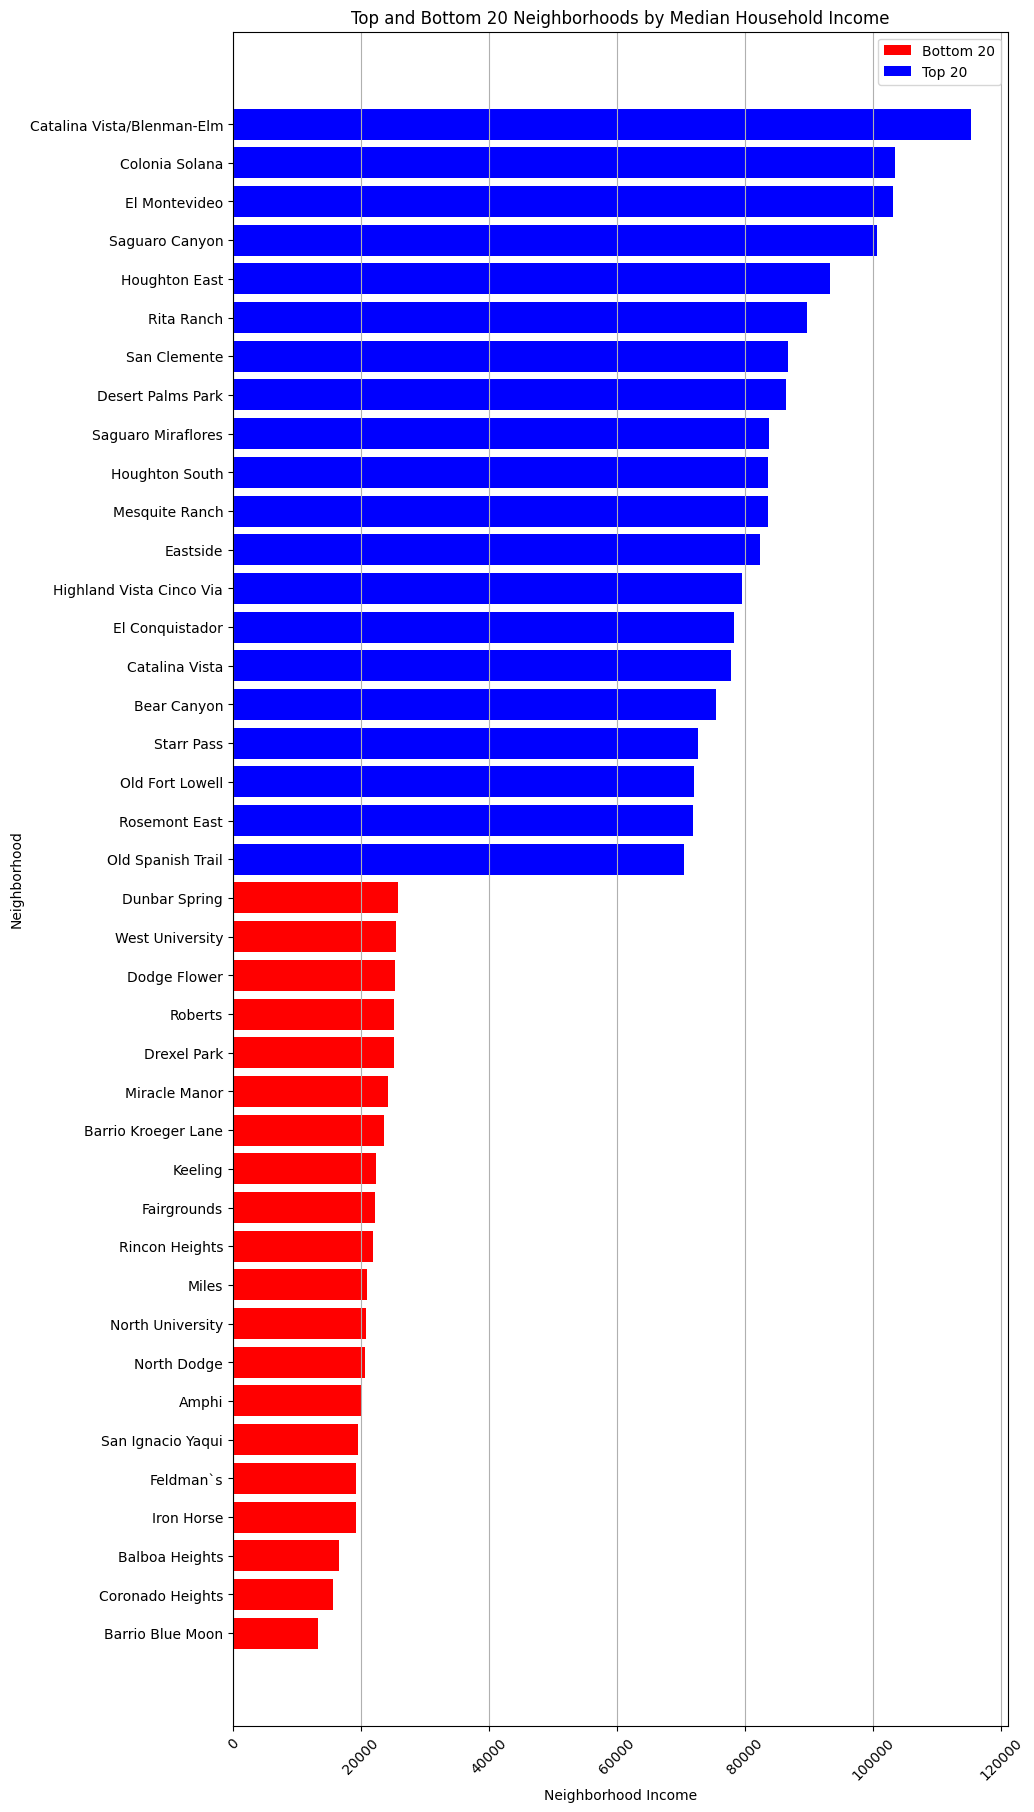

In [10]:
#Get median household income from dataframe and set the index to the name from 2010 - 2019
df_neighborhood_income_name = df_neighborhood_income[["NAME", "MEDHINC_CY"]]
df_neighborhood_income_name.set_index("NAME", inplace=True)
sorted_df_top_20 = df_neighborhood_income_name.sort_values("MEDHINC_CY", ascending=True).head(20)
sorted_df_bottom_20 = df_neighborhood_income_name.sort_values("MEDHINC_CY", ascending=True).tail(20)

#source -> https://www.census.gov/quickfacts/fact/table/tucsoncityarizona/INC110223 => 2019 - 2023
print(f"Median Household Income of all of Tuscon's neighborhood: $54,546")

plt.figure(figsize=(10, 22))
plt.xticks(rotation=45)
plt.barh(sorted_df_top_20.index, sorted_df_top_20["MEDHINC_CY"], color="r")
plt.barh(sorted_df_bottom_20.index, sorted_df_bottom_20["MEDHINC_CY"], color="b")
plt.xlabel("Neighborhood Income")
plt.ylabel("Neighborhood")
plt.title("Top and Bottom 20 Neighborhoods by Median Household Income")
plt.grid(axis="x")
plt.legend(["Bottom 20", "Top 20"])
plt.show()


In [11]:
#Data cleaning for correlation between neighborhood household income and neighbood crime rate
crimes_per_neighborhood_df = df_crime[["NHA_NAME"]].value_counts().to_frame(name="CRIMES")
crimes_per_neighborhood_df.index.rename("NAME", inplace=True)

crime_and_income_df = crimes_per_neighborhood_df.merge(df_neighborhood_income_name, on="NAME", how="outer")
crime_and_income_df.sort_index(axis=0, ascending=True, inplace=True)
#droped 3 neighborhoods becauase there was NaN data for a column, ie either crime/ income wasn't present
crime_and_income_df = crime_and_income_df.dropna()

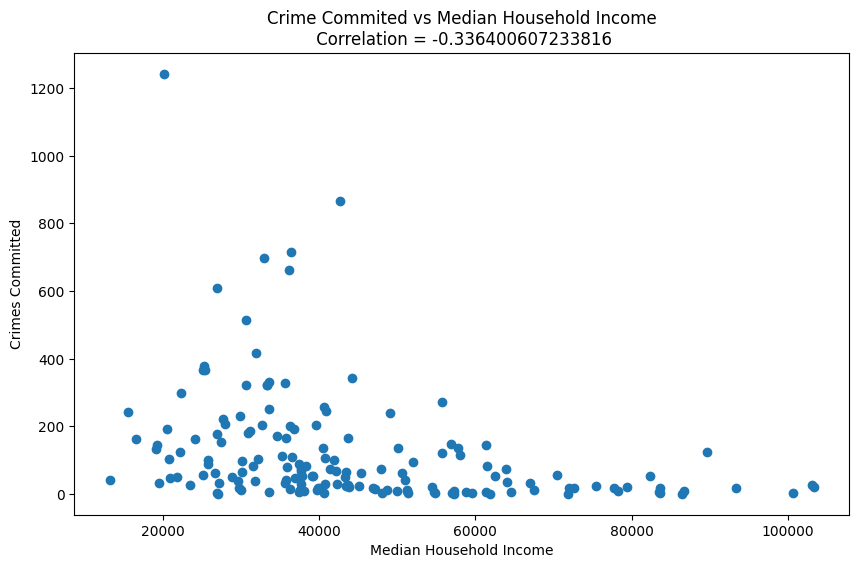

In [12]:
# Scatter plot for correlation between income and crime rate
correlation = crime_and_income_df["MEDHINC_CY"].corr(crime_and_income_df["CRIMES"])


plt.figure(figsize=(10, 6))
plt.scatter(crime_and_income_df["MEDHINC_CY"], crime_and_income_df["CRIMES"] )
plt.xlabel("Median Household Income")
plt.ylabel("Crimes Committed")
plt.title(f"Crime Commited vs Median Household Income\n Correlation = {correlation}")
plt.show()

Coefficients: [-0.00304405], Intercept: 244.91348587593853


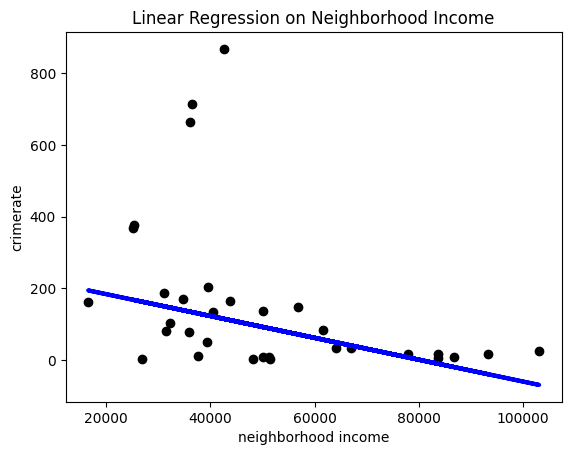

In [20]:
# first model will be a linear regression model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import itertools
from sklearn.model_selection import cross_val_score

x = crime_and_income_df[["MEDHINC_CY"]]
y = crime_and_income_df["CRIMES"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

print(f"Coefficients: {regr.coef_}, Intercept: {regr.intercept_}")

r_squared = regr.score(x_test , y_test)

# plot
# Insert code here
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color = 'b', linewidth=3)

plt.title("Linear Regression on Neighborhood Income vs Crimerate")
plt.xlabel("Median Household Neighborhood Income")
plt.ylabel("# of Crimes Commited")
plt.annotate(f"r^2 ={round(r_squared, 3)}", (2,4))
plt.xticks()
plt.yticks()
plt.show()


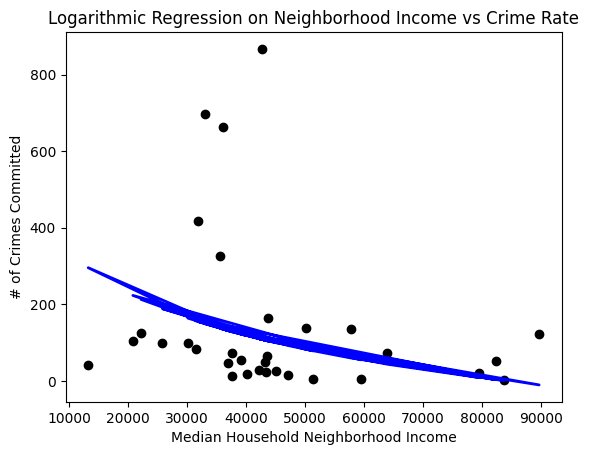

In [26]:
# This seems to not be the best fit because of outliers in the lower income range
# We can try a logarithmic regression model to better suit it.

x_log = np.log(x)
x_train, x_test, y_train, y_test = train_test_split(x_log, y, test_size=0.2)

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

# metrics for later
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

plt.title("Logarithmic Regression on Neighborhood Income vs Crime Rate")
plt.scatter(np.exp(x_test), y_test, color='black')
plt.plot(np.exp(x_test), y_pred, color='b', linewidth=2)
plt.xlabel("Median Household Neighborhood Income")
plt.ylabel("# of Crimes Committed")
plt.xticks()
plt.yticks()
plt.show()


